<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1">Load Data</a></span></li><li><span><a href="#Process-Data" data-toc-modified-id="Process-Data-2">Process Data</a></span><ul class="toc-item"><li><span><a href="#Convert-SMILES-Data" data-toc-modified-id="Convert-SMILES-Data-2.1">Convert SMILES Data</a></span></li><li><span><a href="#Calulate-Lepinski-Descriptors" data-toc-modified-id="Calulate-Lepinski-Descriptors-2.2">Calulate Lepinski Descriptors</a></span></li><li><span><a href="#Calculate-Additional-Molecular-Descriptors" data-toc-modified-id="Calculate-Additional-Molecular-Descriptors-2.3">Calculate Additional Molecular Descriptors</a></span></li></ul></li><li><span><a href="#Visualize-Data" data-toc-modified-id="Visualize-Data-3">Visualize Data</a></span><ul class="toc-item"><li><span><a href="#Predictor-Distributions" data-toc-modified-id="Predictor-Distributions-3.1">Predictor Distributions</a></span></li><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-3.2">Target Distribution</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-3.3">Correlations</a></span></li><li><span><a href="#Filters" data-toc-modified-id="Filters-3.4">Filters</a></span><ul class="toc-item"><li><span><a href="#Lepinski-Filter" data-toc-modified-id="Lepinski-Filter-3.4.1">Lepinski Filter</a></span></li></ul></li><li><span><a href="#Visualize-Molecules" data-toc-modified-id="Visualize-Molecules-3.5">Visualize Molecules</a></span></li></ul></li><li><span><a href="#Export-Data" data-toc-modified-id="Export-Data-4">Export Data</a></span></li></ul></div>

In [115]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
plt.style.use('ggplot')

# Load Data 

In [116]:
data = pd.read_csv('Data/hitdata.csv')
data.head(10)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL231779,APIXABAN,4,459.51,0,2.70,Apixaban,COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4...,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
1,CHEMBL186,CEFEPIME,4,480.57,0,-1.28,cefepime,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[N...,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
2,CHEMBL240597,CHENODIOL,4,392.58,0,4.48,chenodeoxycholic-acid,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CC[C...,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
3,CHEMBL1098,BUPIVACAINE,4,288.44,0,3.90,bupivacaine,CCCCN1CCCCC1C(=O)Nc1c(C)cccc1C,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
4,CHEMBL345714,ACIPIMOX,4,154.12,0,-0.28,Acipimox,Cc1cnc(C(=O)O)c[n+]1[O-],Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
5,CHEMBL498,CHLORPROPAMIDE,4,276.75,0,1.74,Chlorpropamide,CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
6,CHEMBL475534,NITRENDIPINE,4,360.37,0,2.57,nitrendipine,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1cccc([N+](=...,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
7,CHEMBL1625,OXYBENZONE,4,228.25,0,2.63,Oxybenzone,COc1ccc(C(=O)c2ccccc2)c(O)c1,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
8,CHEMBL2359059,NaN,0,403.95,0,3.99,Propiverine hydrochloride,CCCOC(C(=O)OC1CCN(C)CC1)(c1ccccc1)c1ccccc1.Cl,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839
9,CHEMBL421,SULFASALAZINE,4,398.40,0,3.70,Sulfasalazine,O=C(O)c1cc(/N=N/c2ccc(S(=O)(=O)Nc3ccccn3)cc2)c...,Hit score,'=',...,CHEMBL4303835,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303122,52,SARS-CoV-2 Screening Data,NaN,2020,CHEMBL4303839


# Process Data

In [117]:
data = data.drop(columns = ['Document Year', 'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI',
       'Potential Duplicate'])

In [118]:
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL231779,APIXABAN,4,459.51,0,2.70,Apixaban,COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4...,Hit score,'=',0.2748,NaN
1,CHEMBL186,CEFEPIME,4,480.57,0,-1.28,cefepime,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[N...,Hit score,'=',0.1073,NaN
2,CHEMBL240597,CHENODIOL,4,392.58,0,4.48,chenodeoxycholic-acid,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CC[C...,Hit score,'=',0.2031,NaN
3,CHEMBL1098,BUPIVACAINE,4,288.44,0,3.90,bupivacaine,CCCCN1CCCCC1C(=O)Nc1c(C)cccc1C,Hit score,'=',0.1503,NaN
4,CHEMBL345714,ACIPIMOX,4,154.12,0,-0.28,Acipimox,Cc1cnc(C(=O)O)c[n+]1[O-],Hit score,'=',0.1380,NaN


## Convert SMILES Data

In [119]:
molecules = []
success = []
for smile in data['Smiles']:
    try:
        molecules.append(Chem.MolFromSmiles(smile))
        success.append(True)
    except:
        success.append(False)

In [120]:
# keep data where molecule procesing is successful
data = data[success]
data = data.reset_index()

In [121]:
data

,index,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,0,CHEMBL231779,APIXABAN,4,459.51,0,2.70,Apixaban,COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4...,Hit score,'=',0.2748,NaN
1,1,CHEMBL186,CEFEPIME,4,480.57,0,-1.28,cefepime,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[N...,Hit score,'=',0.1073,NaN
2,2,CHEMBL240597,CHENODIOL,4,392.58,0,4.48,chenodeoxycholic-acid,C[C@H](CCC(=O)O)[C@H]1CC[C@H]2[C@H]3[C@H](CC[C...,Hit score,'=',0.2031,NaN
3,3,CHEMBL1098,BUPIVACAINE,4,288.44,0,3.90,bupivacaine,CCCCN1CCCCC1C(=O)Nc1c(C)cccc1C,Hit score,'=',0.1503,NaN
4,4,CHEMBL345714,ACIPIMOX,4,154.12,0,-0.28,Acipimox,Cc1cnc(C(=O)O)c[n+]1[O-],Hit score,'=',0.1380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1664,CHEMBL6,INDOMETHACIN,4,357.79,0,3.93,Indomethacin,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Hit score,'=',0.1032,NaN
1655,1665,CHEMBL1311,ISOSORBIDE MONONITRATE,4,191.14,0,-1.28,Isosorbide mononitrate,O=[N+]([O-])O[C@@H]1CO[C@@H]2[C@@H](O)CO[C@H]12,Hit score,'=',0.1018,NaN
1656,1666,CHEMBL42280,L-ADRENALINE,0,183.21,0,0.35,L-Adrenaline,CNC[C@@H](O)c1ccc(O)c(O)c1,Hit score,'=',-0.1051,NaN
1657,1667,CHEMBL460291,LACIDIPINE,4,455.55,0,4.40,"LACIDIPINE (LACIPIL, MOTENS)",CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1c1ccccc1/C=C...,Hit score,'=',0.0561,NaN


## Calulate Lepinski Descriptors

In [122]:
def lipinski(molecules, verbose=False):
    """
    Calculates the Lipinski rule of 5 descriptors for a set of molecules
    
    Parameters
    ----------
    molecules : array_like
        array of rdkit molecule objects
        
    Returns
    -------
    DataFrame
    """
    lipinski_ = {"MW": Descriptors.MolWt,"LogP": Descriptors.MolLogP,"NumHDonors": Lipinski.NumHDonors,"NumHAcceptors": Lipinski.NumHAcceptors}
    result = [{item[0]: item[1](molecule) for item in lipinski_.items()} for molecule in molecules]
    return pd.DataFrame(result)

lipinski_df = lipinski(molecules)

In [123]:
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,459.506,2.69960,1,6
1,480.572,-1.27990,2,10
2,392.580,4.47790,3,3
3,288.435,3.89654,1,2
4,154.125,-0.27838,1,3
...,...,...,...,...
1654,357.793,3.92732,1,4
1655,191.139,-1.27820,1,6
1656,183.207,0.35060,4,4
1657,455.551,4.40250,1,7


## Calculate Additional Molecular Descriptors

In [124]:
def get_SAmapping(molecule) -> int:
    """
    Wrapper function to get topological surface area mapping for a given molecule
    Parameters
    ----------
    molecule: rdkit molecule object
    Returns
    -------
    int
    """
    return Chem.QED.properties(molecule).PSA
    
    
def molecular_properties(molecules, verbose = False):
    """
    Calculates the following attributes of a set of molecules
    rotatable_bonds
    number_of_atoms
    molar_refractivity 
    topological_surface_area_mapping
    formal_charge 
    heavy_atoms 
    num_of_rings 

    Parameters
    ----------
    molecules : array_like
    array of rdkit molecule objects

    Returns
    -------
    DataFrame
    """
    properties = {'rotatable_bonds' : Descriptors.NumRotatableBonds, 'number_of_atoms': Chem.rdchem.Mol.GetNumAtoms,
                 'molar_refractivity': Chem.Crippen.MolMR, "SA_mapping" : get_SAmapping,
                 'formal_charge': Chem.rdmolops.GetFormalCharge, 'heavy_atoms': Chem.rdchem.Mol.GetNumHeavyAtoms, 
                  'num_of_rings' :Chem.rdMolDescriptors.CalcNumRings}
    result = [{prop[0]: prop[1](molecule) for prop in properties.items()} for molecule in molecules]
    return pd.DataFrame(result)

property_df = molecular_properties(molecules)
# Combine data
data = pd.concat([data, lipinski_df, property_df], axis = 1)

# Visualize Data 
- distributions of predictors
- distribtuion of target
- correlations between predictors - explain based on physical properties
- ones passing ghose and lepinski filter

## Predictor Distributions

/Users/ethankim/anaconda3/envs/DrugDiscovery/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


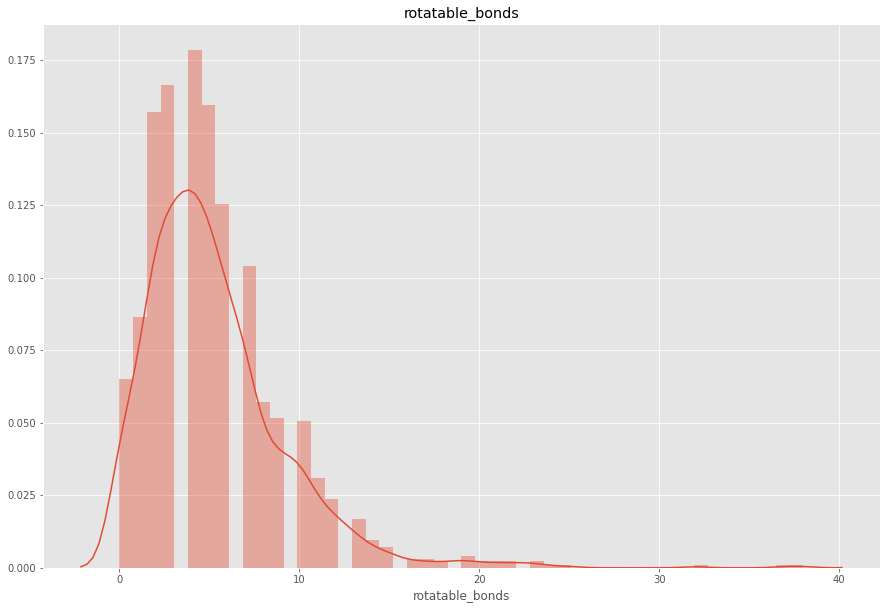

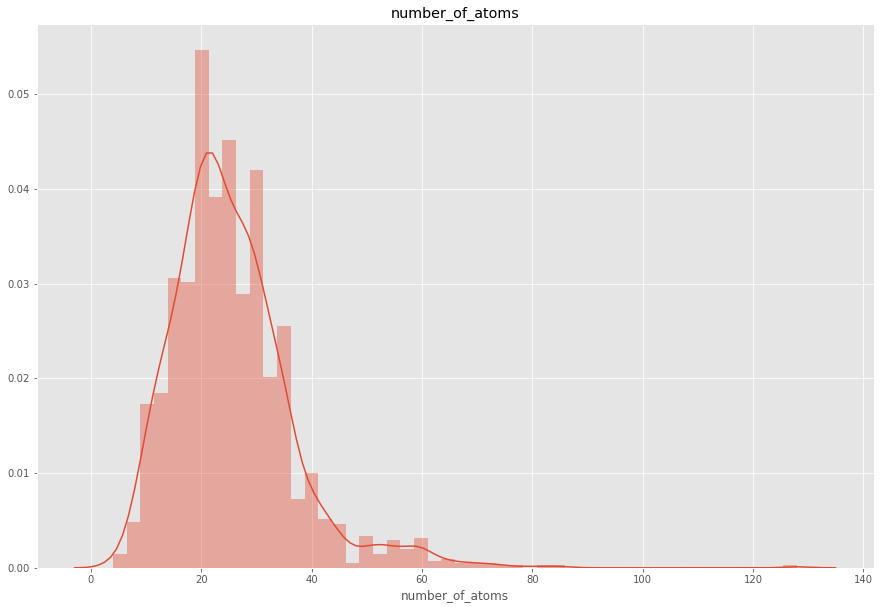

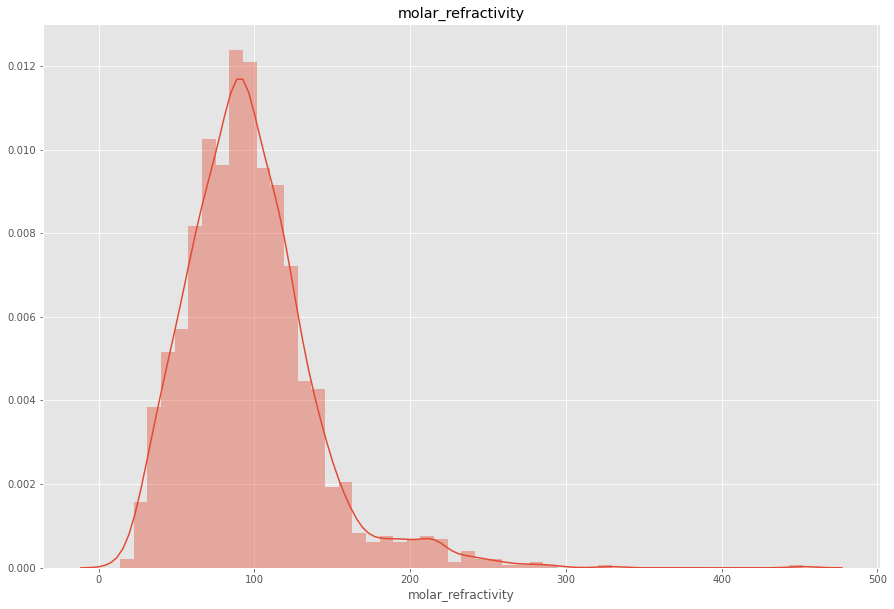

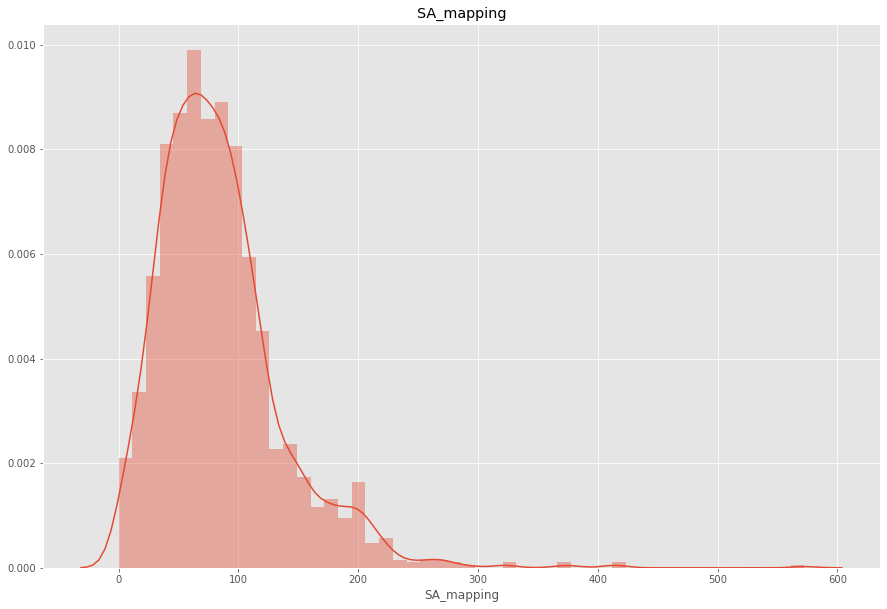

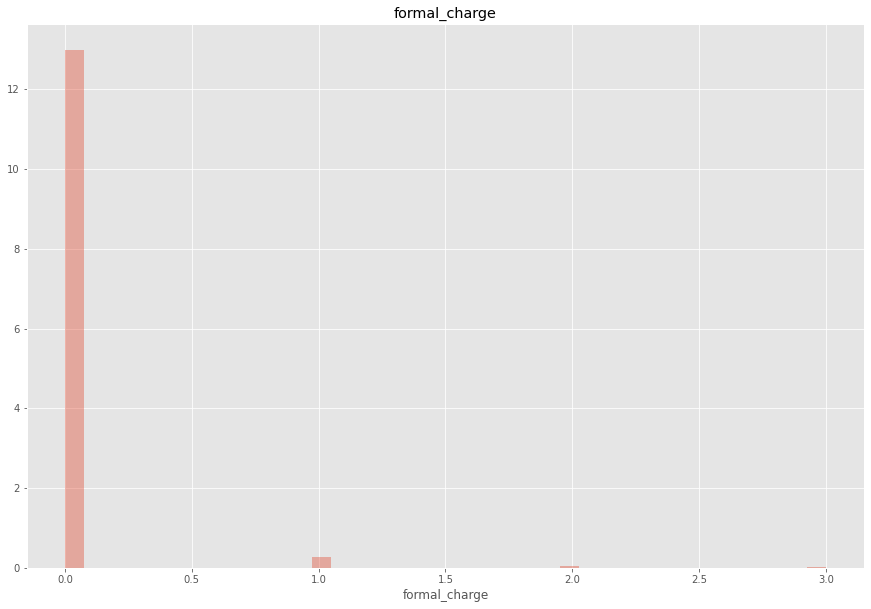

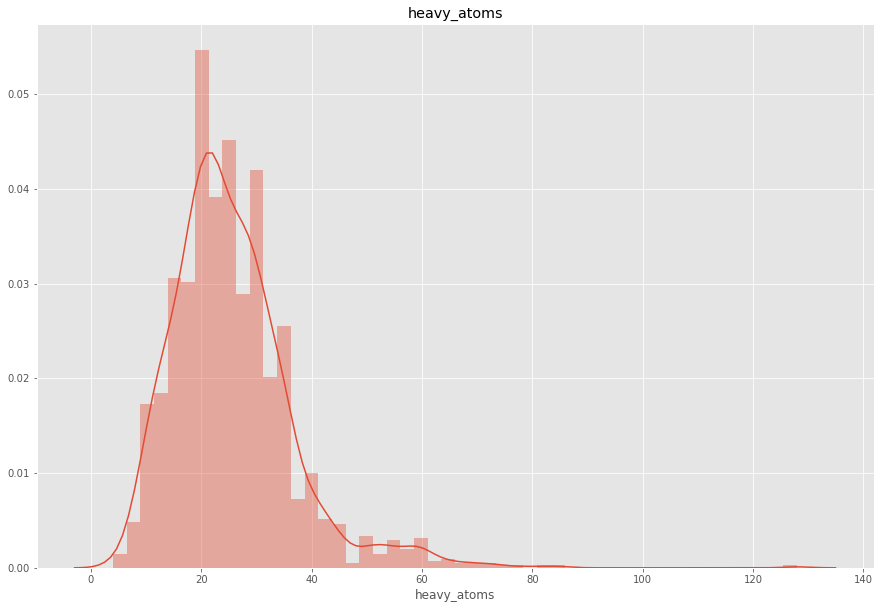

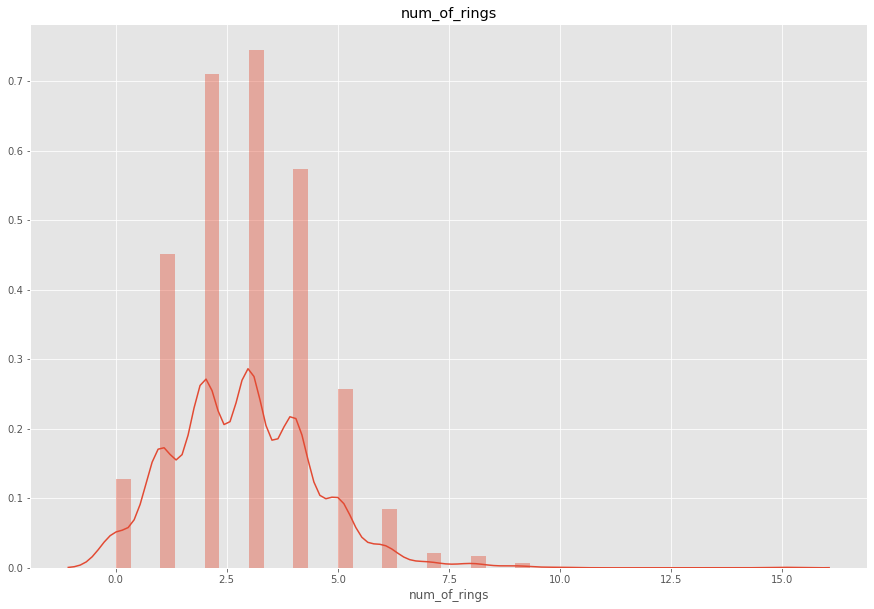

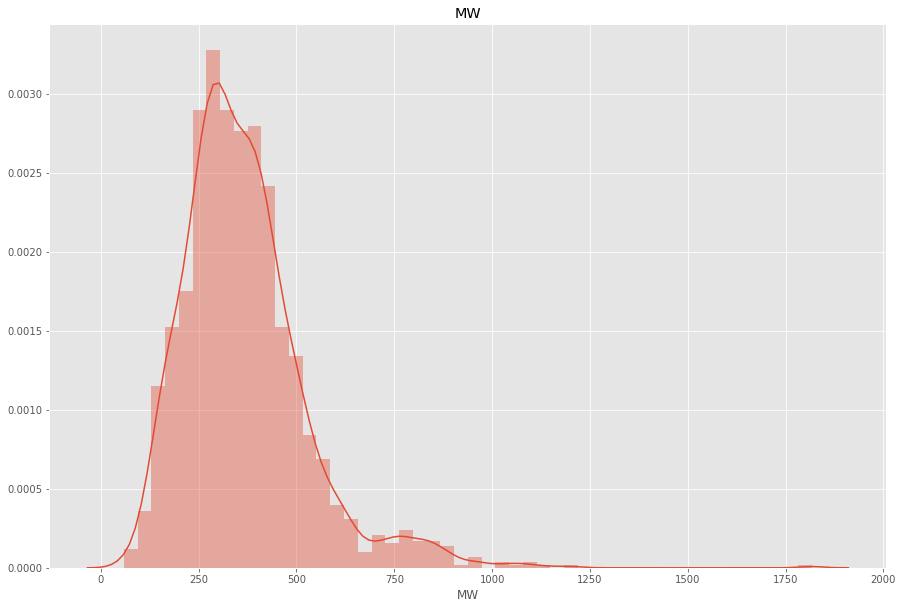

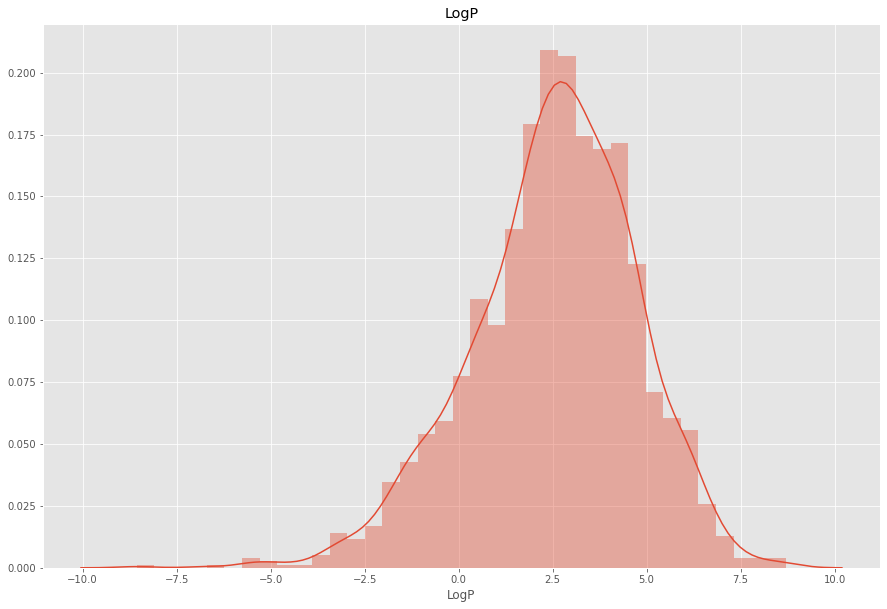

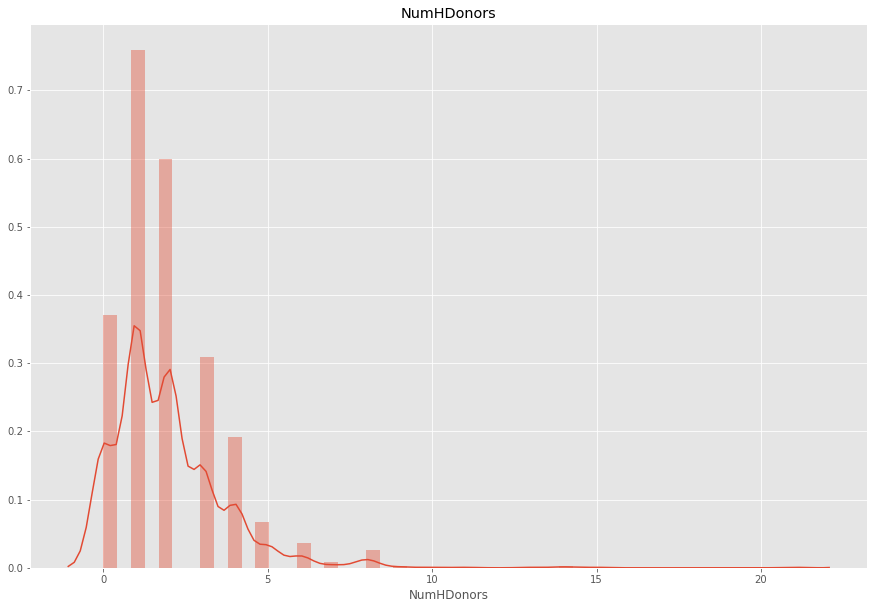

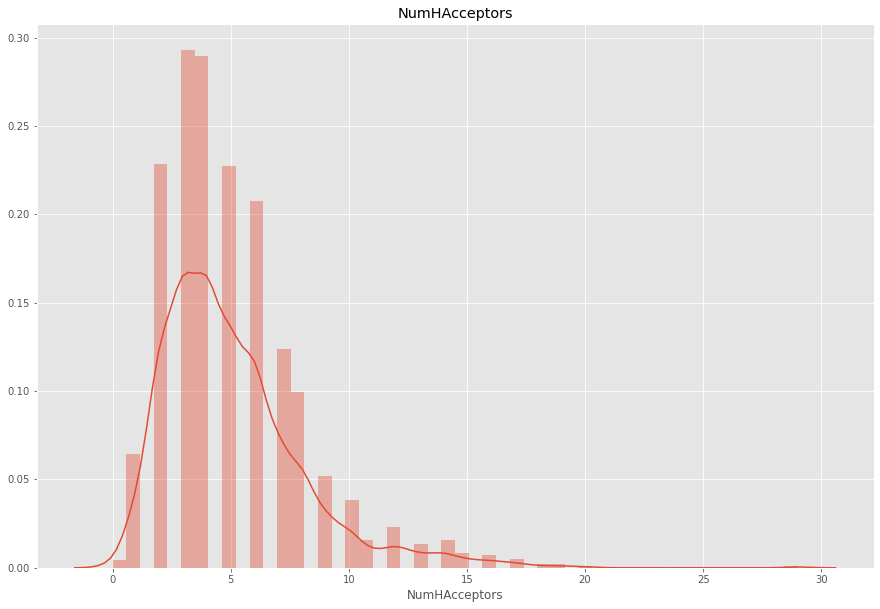

In [148]:
# List of predictors
predictors = ['rotatable_bonds', 'number_of_atoms', 'molar_refractivity','SA_mapping', 'formal_charge', 'heavy_atoms','num_of_rings', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
for predictor in predictors:
    try:
        fig, ax = plt.subplots(1, 1, figsize = (15, 10))
        ax.set_title(predictor)
        sns.distplot(data[predictor], ax = ax)
    except:
        pass

In [172]:
# Drop formal charge since it doesn't provide much info 
#data = data.drop(columns=['formal_charge'])
predictors.remove('formal_charge')

The distributions of these predictor values in general seem to be close to  normally distributed with pronounced right skew

## Target Distribution

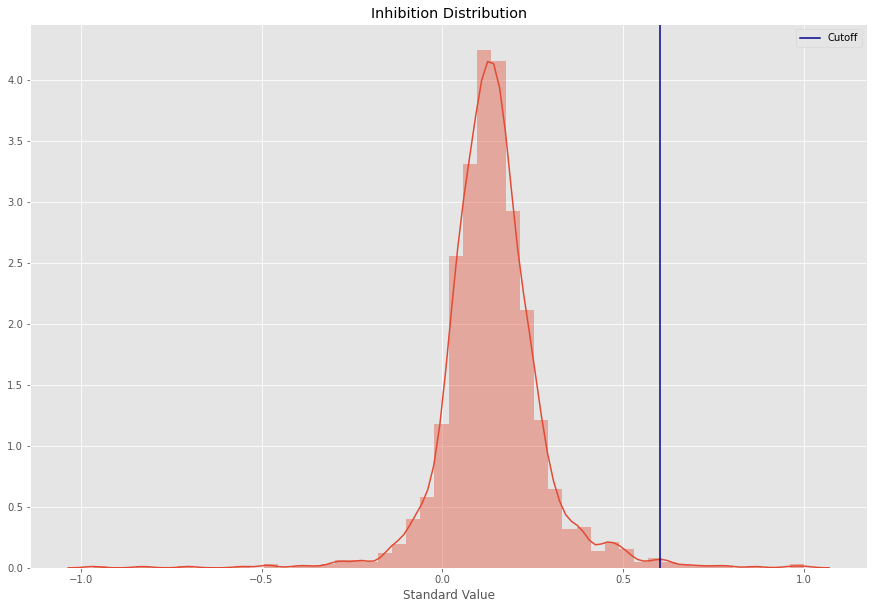

In [165]:
target = 'Standard Value'
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_title('Inhibition Distribution')
sns.distplot(data['Standard Value'], ax = ax)
ax.axvline(x = 0.6, color = 'darkblue', label = 'Cutoff')
ax.legend()
fig.savefig('Images/target_distribution')

In [167]:
candidates = data[data['Standard Value'] > 0.6]
print(len(candidates))

13


The target distribution appears to be very nicely normally distributed. The blue line shows a cutoff at 0.6 where drugs are considered to be hits or not. Overall, we have 13 drugs that meet this criteria out of 1659 indicating that we might have a class imbalance problem when trying to predict the efficacy of these drugs. 

## Correlations

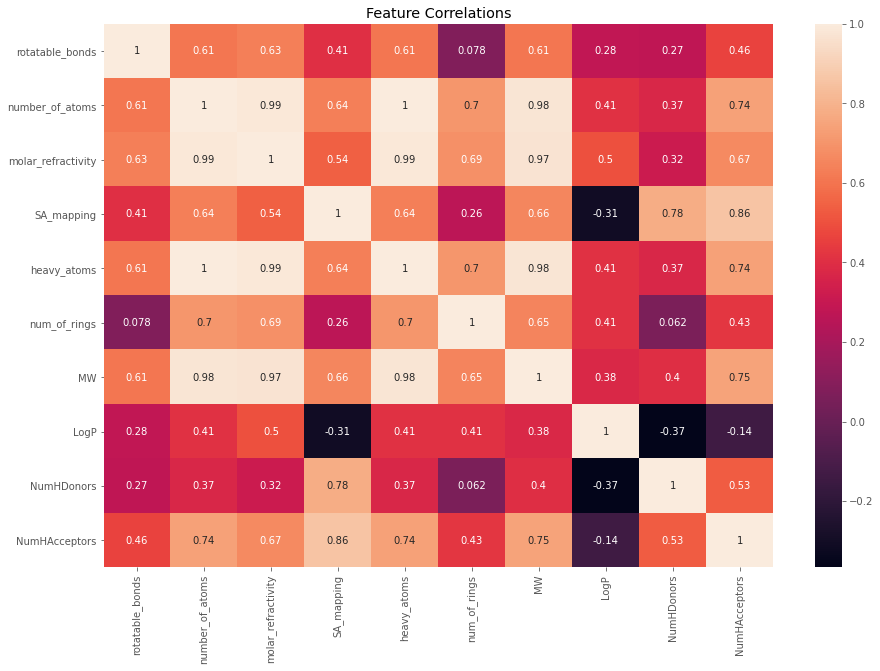

In [215]:
def plot_correlation(data, ax):
    """"""
    """
    Plot heapmap of correlations between features
    
    Parameters
    ----------
    data : array of numerical values
    ax : matplotlib axis to plot on 
    
    Returns
    -------
    Plotted Heatmap
    """
    cor_matrix = data.corr()
    sns.heatmap(cor_matrix, annot=True, ax = ax)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_title('Feature Correlations')
plot_correlation(data[predictors], ax = ax)
fig.savefig('Images/feature_correlations')

Some correlations between features are quite high. A number of these can be inferred from the physical meaning of the individual predictors. For example, the number of atoms is very highly correlated with the number of heavy items in a molecules as well as with the Molecular Weight. This makes sense because each additional heavy atom is an additional atom and also increases the weight of the molecule. The molar refractivity is also very highly correlated with the number of atoms. To avoid problems with multicollinearity we can use only the number of atoms as a predictor in our model. 

## Filters
### Lepinski Filter
Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:
- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- An octanol-water partition coefficient  (log P) that does not exceed 5
We can check in the data set how many drugs meet these requirements

/Users/ethankim/anaconda3/envs/DrugDiscovery/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Lepinski Rule of Five Violation'}, xlabel='#RO5 Violations'>

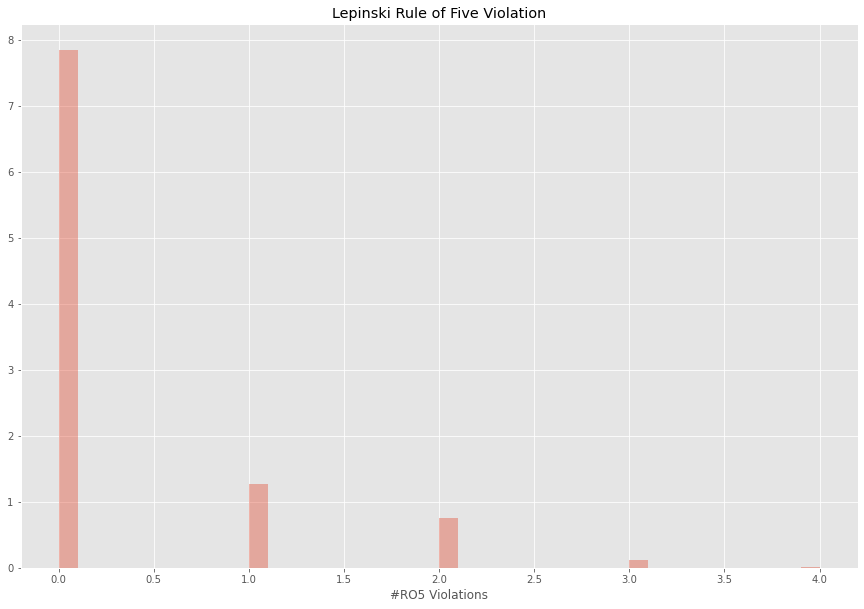

In [232]:
# Replace nones with 0 
data.loc[data['#RO5 Violations'] == 'None','#RO5 Violations' ] = 0
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.set_title('Lepinski Rule of Five Violation')
sns.distplot(data['#RO5 Violations'], ax = ax)

Most of the drugs to fit the Rule of 5 criteria and thus may be good potential candidates. 

## Visualize Molecules
Look at molecular and structure names for candidate molecules

ALOXISTATIN


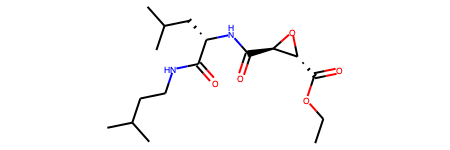

In [202]:
print(candidates.loc[candidates.index[0]]['Molecule Name'])
molecules[candidates.index[0]]

nan


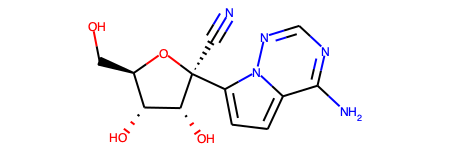

In [203]:
print(candidates.loc[candidates.index[1]]['Molecule Name'])
molecules[candidates.index[1]]

ALMITRINE


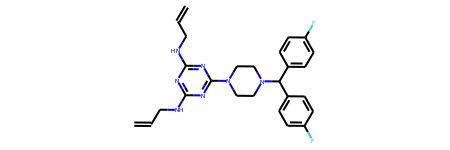

In [204]:
print(candidates.loc[candidates.index[2]]['Molecule Name'])
molecules[candidates.index[2]]

CALCIPOTRIENE


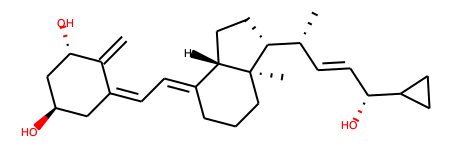

In [205]:
print(candidates.loc[candidates.index[3]]['Molecule Name'])
molecules[candidates.index[3]]

SOLITHROMYCIN


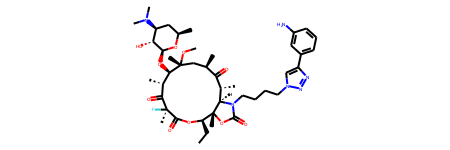

In [206]:
print(candidates.loc[candidates.index[4]]['Molecule Name'])
molecules[candidates.index[4]]

ZOTAROLIMUS


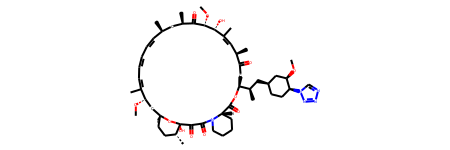

In [207]:
print(candidates.loc[candidates.index[5]]['Molecule Name'])
molecules[candidates.index[5]]

CHLOROQUINE


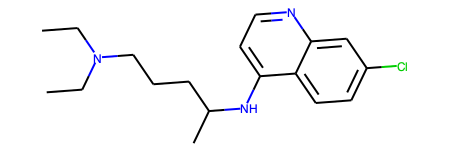

In [208]:
print(candidates.loc[candidates.index[6]]['Molecule Name'])
molecules[candidates.index[6]]

nan


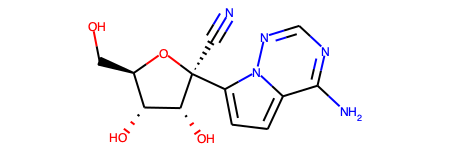

In [209]:
print(candidates.loc[candidates.index[7]]['Molecule Name'])
molecules[candidates.index[7]]

SILMITASERTIB


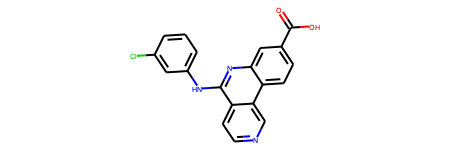

In [210]:
print(candidates.loc[candidates.index[8]]['Molecule Name'])
molecules[candidates.index[8]]

DUVELISIB


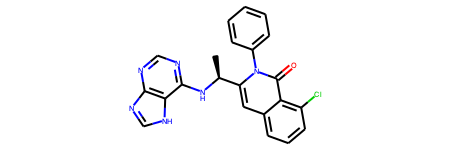

In [211]:
print(candidates.loc[candidates.index[9]]['Molecule Name'])
molecules[candidates.index[9]]

SIROLIMUS


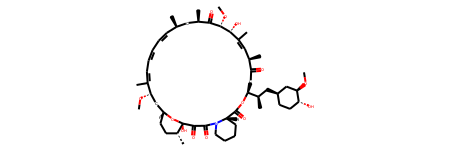

In [212]:
print(candidates.loc[candidates.index[10]]['Molecule Name'])
molecules[candidates.index[10]]

REMDESIVIR


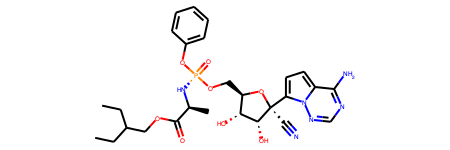

In [213]:
print(candidates.loc[candidates.index[11]]['Molecule Name'])
molecules[candidates.index[11]]

ALPELISIB


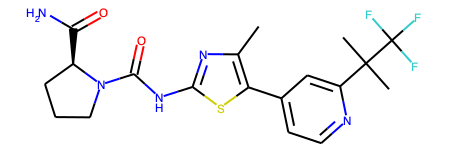

In [214]:
print(candidates.loc[candidates.index[12]]['Molecule Name'])
molecules[candidates.index[12]]

# Export Data

In [233]:
data.to_csv('Data/processed_data')